# <font color='orange'>UNICEF Video Advertising Analytics</font>
**Background Information**

* Background information On [UNICEF](https://www.unicef.org.au/)
* 3987 Videos from [UNICEF YouTube Page](https://www.youtube.com/user/unicef)
* Microsoft Indexer
* Seaborn library

__________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________
## <font color='orange'>The aims</font>
**To learn about common data visualization techniques such as:**

1. Bar charts
2. Scatter plots
3. Box plots
4. Histograms.

**To answer the question: What video features influence the number of 'likes' given to a UNICEF advertisement?**

__________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________
# <font color='orange'>Setup</font>

__________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________
## <font color='orange'>Import packages</font>

In [ ]:
!pip install --upgrade seaborn

Requirement already up-to-date: seaborn in /usr/local/lib/python3.6/dist-packages (0.10.1)


In [ ]:
import pandas as pd
import statsmodels.api as sm
import seaborn as sns; sns.set()
#from week2_helpers import variance_inflation_factor

import warnings
warnings.filterwarnings('ignore')

__________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________
## <font color='orange'>Load the data and helper files into Colab</font>

In [ ]:
# TODO: Import "week2_helpers.py" (this has VIF implementation in it)

youtube_df = pd.read_csv("/content/unicef_youtube.csv")
indexer_df = pd.read_csv("/content/unicef_indexer.csv")

In [ ]:
youtube_df[0:50]

,genre,height,is_family_friendly,likes,url,video_id,width,tags_length,title_entities_unicef,title_entities_haiti,title_entities_pakistan,title_entities_congo,title_entities_syrian,title_entities_dr,title_entities_ethiopia,title_entities_somalia,title_entities_afghanistan,title_entities_syria,title_entities_kenya,title_entities_gaza,title_entities_2,title_entities_niger,title_entities_unicef_executive,title_entities_un,title_entities_unicef_executive_board,title_entities_myanmar,title_entities_mia_farrow,title_entities_executive_board,title_entities_india,title_entities_lebanon,title_entities_palestinian,title_entities_philippines,title_entities_chad,title_entities_uganda,title_entities_bangladesh,title_entities_africa,title_entities_zimbabwe,title_entities_first,title_entities_mali,title_entities_5,...,tags_poverty,tags_fund,tags_kids,tags_human,tags_nonprofit,tags_charity,tags_news,tags_earth,tags_profit,tags_africa,tags_celebrity,tags_celebrities,tags_water,tags_aids,tags_sanitation,tags_world,tags_nutrition,tags_hivaids,tags_schools,tags_youth,tags_emergencies,tags_crisis,tags_animation,tags_conflict,tags_haiti,tags_syria,tags_republic,tags_earthquake,tags_refugee,tags_executive,tags_country,tags_survival,tags_refugees,tags_immunization,tags_malnutrition,title_length,description_length,date_published_year,date_published_month,date_published_day
0,Nonprofits & Activism,720,True,2.0,https://www.youtube.com/watch?v=f7fAcMjcjQs&in...,f7fAcMjcjQs,1280,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,10,26,2011,6,20
1,Nonprofits & Activism,720,True,898.0,https://www.youtube.com/watch?v=hXuVxFLGpFM&t=...,hXuVxFLGpFM,1280,8,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,14,21,2016,9,6
2,Nonprofits & Activism,720,True,NaN,https://www.youtube.com/watch?v=INimxrewMXo&li...,INimxrewMXo,1280,48,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,2,0,2,0,1,1,0,2,0,0,0,0,0,0,8,27,2013,3,11
3,Nonprofits & Activism,720,True,2.0,https://www.youtube.com/watch?v=SOaVUrh_LyI&t=...,SOaVUrh_LyI,1280,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7,0,2012,9,10
4,Nonprofits & Activism,360,True,17.0,https://www.youtube.com/watch?v=yRx58hgSOZk&t=...,yRx58hgSOZk,480,10,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8,27,2009,9,23
5,Nonprofits & Activism,360,True,19.0,https://www.youtube.com/watch?v=HVdibxLf9qM&in...,HVdibxLf9qM,480,8,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8,25,2009,6,21
6,Nonprofits & Activism,360,True,6.0,https://www.youtube.com/watch?v=mA1SnN4N_zo&li...,mA1SnN4N_zo,640,12,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11,21,2010,6,23
7,Nonprofits & Activism,360,True,5.0,https://www.youtube.com/watch?v=3BrN_50GmI4&in...,3BrN_50GmI4,640,9,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,24,2010,10,7
8,Nonprofits & Activism,720,True,3.0,https://www.youtube.com/watch?v=5rg0rFSe5Kg&in...,5rg0rFSe5Kg,1280,11,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,10,23,2011,7,13
9,Nonprofits & Activism,360,True,1.0,https://www.youtube.com/watch?v=j_tCEBWI1U4&t=...,j_tCEBWI1U4,640,33,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8,24,2012,3,15


__________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________
## <font color='orange'>Merge DataFrames</font>
Merge based on 'id' column

In [ ]:
df_merge = youtube_df.merge(indexer_df, left_on = "video_id", right_on = "id")

In [ ]:
df_merge.head()

,genre,height,is_family_friendly,likes,url,video_id,width,tags_length,title_entities_unicef,title_entities_haiti,title_entities_pakistan,title_entities_congo,title_entities_syrian,title_entities_dr,title_entities_ethiopia,title_entities_somalia,title_entities_afghanistan,title_entities_syria,title_entities_kenya,title_entities_gaza,title_entities_2,title_entities_niger,title_entities_unicef_executive,title_entities_un,title_entities_unicef_executive_board,title_entities_myanmar,title_entities_mia_farrow,title_entities_executive_board,title_entities_india,title_entities_lebanon,title_entities_palestinian,title_entities_philippines,title_entities_chad,title_entities_uganda,title_entities_bangladesh,title_entities_africa,title_entities_zimbabwe,title_entities_first,title_entities_mali,title_entities_5,...,indexer_ocr_unicefotelevision_area,indexer_ocr_mother_area,indexer_ocr_www.unicef.org_area,indexer_ocr_children_area,indexer_ocr_for_every_child_area,indexer_ocr_unicefg@_area,indexer_ocr_unicef_executive_director_area,indexer_ocr_allchiidren_area,indexer_ocr_rights_area,indexer_ocr_for_children_area,indexer_ocr_share_this_video_area,indexer_ocr_advance_humanity_area,indexer_ocr_theoneminutesjr._area,indexer_ocr_1946-2006_area,indexer_ocr_unicef_goodwill_ambassador_area,indexer_ocr_all_area,indexer_ocr_and_area,indexer_ocr_for_area,indexer_ocr_unicefo_television_area,indexer_ocr_unicef(ò)g_area,indexer_ocr_to_area,indexer_ocr_unicefg@_for_every_child_area,indexer_ocr_unicefoteievision_area,indexer_ocr_unicef&_television_area,indexer_ocr_student_area,indexer_ocr_unicef@org_area,"indexer_ocr_health,_education,_equality,_protection_area",indexer_ocr_unicef.org/rightsite_area,indexer_ocr_unicefo)_area,indexer_ocr_ann_m._veneman_area,indexer_ocr_the_area,indexer_ocr_anthony_lake_area,indexer_ocr_unice_area,indexer_ocr_teacher_area,indexer_ocr_director_area,indexer_ocr_president_area,indexer_ocr_unicef(û)g_area,indexer_num_faces,indexer_num_shots,indexer_statistics_correspondence_count
0,Nonprofits & Activism,720,True,2.0,https://www.youtube.com/watch?v=f7fAcMjcjQs&in...,f7fAcMjcjQs,1280,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,82626,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,15,2
1,Nonprofits & Activism,720,True,898.0,https://www.youtube.com/watch?v=hXuVxFLGpFM&t=...,hXuVxFLGpFM,1280,8,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,19885,0,0,0,0,0,0,5661,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7,26,3
2,Nonprofits & Activism,720,True,NaN,https://www.youtube.com/watch?v=INimxrewMXo&li...,INimxrewMXo,1280,48,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10,40,10
3,Nonprofits & Activism,720,True,2.0,https://www.youtube.com/watch?v=SOaVUrh_LyI&t=...,SOaVUrh_LyI,1280,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,7,0
4,Nonprofits & Activism,360,True,17.0,https://www.youtube.com/watch?v=yRx58hgSOZk&t=...,yRx58hgSOZk,480,10,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,21,22,0


__________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________
## <font color='orange'>Data cleaning</font>

Remove columns that do not contain useful information about predicting 'likes'.

In [ ]:
remove_cols = [
    "id",
    "video_id",
    "url",
]
df_merge = df_merge.drop(columns=remove_cols, axis=1)

In [ ]:
df_merge.head()

,genre,height,is_family_friendly,likes,width,tags_length,title_entities_unicef,title_entities_haiti,title_entities_pakistan,title_entities_congo,title_entities_syrian,title_entities_dr,title_entities_ethiopia,title_entities_somalia,title_entities_afghanistan,title_entities_syria,title_entities_kenya,title_entities_gaza,title_entities_2,title_entities_niger,title_entities_unicef_executive,title_entities_un,title_entities_unicef_executive_board,title_entities_myanmar,title_entities_mia_farrow,title_entities_executive_board,title_entities_india,title_entities_lebanon,title_entities_palestinian,title_entities_philippines,title_entities_chad,title_entities_uganda,title_entities_bangladesh,title_entities_africa,title_entities_zimbabwe,title_entities_first,title_entities_mali,title_entities_5,title_entities_iraq,title_entities_south_sudan,...,indexer_ocr_unicefotelevision_area,indexer_ocr_mother_area,indexer_ocr_www.unicef.org_area,indexer_ocr_children_area,indexer_ocr_for_every_child_area,indexer_ocr_unicefg@_area,indexer_ocr_unicef_executive_director_area,indexer_ocr_allchiidren_area,indexer_ocr_rights_area,indexer_ocr_for_children_area,indexer_ocr_share_this_video_area,indexer_ocr_advance_humanity_area,indexer_ocr_theoneminutesjr._area,indexer_ocr_1946-2006_area,indexer_ocr_unicef_goodwill_ambassador_area,indexer_ocr_all_area,indexer_ocr_and_area,indexer_ocr_for_area,indexer_ocr_unicefo_television_area,indexer_ocr_unicef(ò)g_area,indexer_ocr_to_area,indexer_ocr_unicefg@_for_every_child_area,indexer_ocr_unicefoteievision_area,indexer_ocr_unicef&_television_area,indexer_ocr_student_area,indexer_ocr_unicef@org_area,"indexer_ocr_health,_education,_equality,_protection_area",indexer_ocr_unicef.org/rightsite_area,indexer_ocr_unicefo)_area,indexer_ocr_ann_m._veneman_area,indexer_ocr_the_area,indexer_ocr_anthony_lake_area,indexer_ocr_unice_area,indexer_ocr_teacher_area,indexer_ocr_director_area,indexer_ocr_president_area,indexer_ocr_unicef(û)g_area,indexer_num_faces,indexer_num_shots,indexer_statistics_correspondence_count
0,Nonprofits & Activism,720,True,2.0,1280,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,82626,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,15,2
1,Nonprofits & Activism,720,True,898.0,1280,8,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,19885,0,0,0,0,0,0,5661,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7,26,3
2,Nonprofits & Activism,720,True,NaN,1280,48,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10,40,10
3,Nonprofits & Activism,720,True,2.0,1280,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,7,0
4,Nonprofits & Activism,360,True,17.0,480,10,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,21,22,0


Remove rows that contain 'NA' in the 'likes' column.

In [ ]:
df_merge = df_merge.dropna(subset=["likes"])

In [ ]:
df_merge.head()

,genre,height,is_family_friendly,likes,width,tags_length,title_entities_unicef,title_entities_haiti,title_entities_pakistan,title_entities_congo,title_entities_syrian,title_entities_dr,title_entities_ethiopia,title_entities_somalia,title_entities_afghanistan,title_entities_syria,title_entities_kenya,title_entities_gaza,title_entities_2,title_entities_niger,title_entities_unicef_executive,title_entities_un,title_entities_unicef_executive_board,title_entities_myanmar,title_entities_mia_farrow,title_entities_executive_board,title_entities_india,title_entities_lebanon,title_entities_palestinian,title_entities_philippines,title_entities_chad,title_entities_uganda,title_entities_bangladesh,title_entities_africa,title_entities_zimbabwe,title_entities_first,title_entities_mali,title_entities_5,title_entities_iraq,title_entities_south_sudan,...,indexer_ocr_unicefotelevision_area,indexer_ocr_mother_area,indexer_ocr_www.unicef.org_area,indexer_ocr_children_area,indexer_ocr_for_every_child_area,indexer_ocr_unicefg@_area,indexer_ocr_unicef_executive_director_area,indexer_ocr_allchiidren_area,indexer_ocr_rights_area,indexer_ocr_for_children_area,indexer_ocr_share_this_video_area,indexer_ocr_advance_humanity_area,indexer_ocr_theoneminutesjr._area,indexer_ocr_1946-2006_area,indexer_ocr_unicef_goodwill_ambassador_area,indexer_ocr_all_area,indexer_ocr_and_area,indexer_ocr_for_area,indexer_ocr_unicefo_television_area,indexer_ocr_unicef(ò)g_area,indexer_ocr_to_area,indexer_ocr_unicefg@_for_every_child_area,indexer_ocr_unicefoteievision_area,indexer_ocr_unicef&_television_area,indexer_ocr_student_area,indexer_ocr_unicef@org_area,"indexer_ocr_health,_education,_equality,_protection_area",indexer_ocr_unicef.org/rightsite_area,indexer_ocr_unicefo)_area,indexer_ocr_ann_m._veneman_area,indexer_ocr_the_area,indexer_ocr_anthony_lake_area,indexer_ocr_unice_area,indexer_ocr_teacher_area,indexer_ocr_director_area,indexer_ocr_president_area,indexer_ocr_unicef(û)g_area,indexer_num_faces,indexer_num_shots,indexer_statistics_correspondence_count
0,Nonprofits & Activism,720,True,2.0,1280,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,82626,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,15,2
1,Nonprofits & Activism,720,True,898.0,1280,8,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,19885,0,0,0,0,0,0,5661,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7,26,3
3,Nonprofits & Activism,720,True,2.0,1280,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,7,0
4,Nonprofits & Activism,360,True,17.0,480,10,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,21,22,0
5,Nonprofits & Activism,360,True,19.0,480,8,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,12,30,0


__________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________
# <font color='orange'>Data Visualisation Techniques</font>
Before we run regression analysis on our data, we carry out **exploratory data analysis** by visualizing our data.

Some reasons why we do this include:
* Predict which columns may or may not be important in the regression analysis (i.e. create hypotheses)
* See patterns/trends between two or more variables
* Ensure our data looks ok or needs more cleaning.

__________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________
### <font color='orange'>Bar plots</font>
* Plot number of UNICEF videos published for each year
* Plot average 'likes' received on UNICEF videos for each year (include confidence interval of plot)

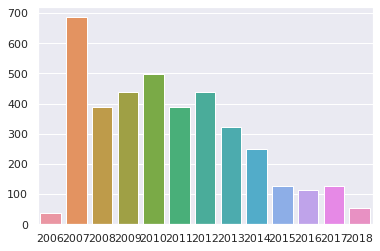

In [ ]:
video_frequency = df_merge["date_published_year"].value_counts() 
year_plot = sns.barplot(x=video_frequency.index, y=video_frequency.values)

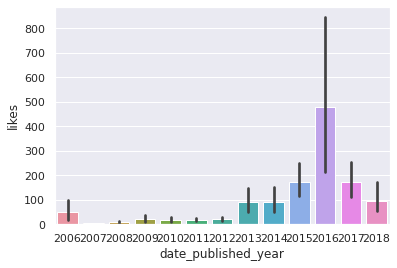

In [ ]:
year_plot_avg_likes = sns.barplot(x="date_published_year", y="likes", data=df_merge)

__________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________
### <font color='orange'>Scatter plots</font>
* Create a scatter plot that shows the relationship between 'views' and 'likes' for UNICEF videos

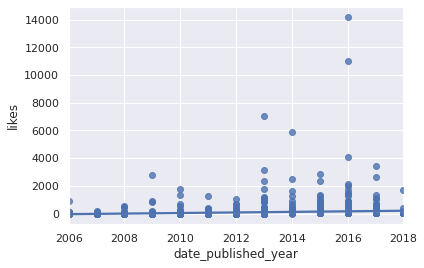

In [ ]:
like_interaction = sns.regplot(x="date_published_year", y="likes", data=df_merge)

__________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________
### <font color='orange'>Box plots</font>
* Create a box plot showing the distribution of 'likes' received on UNICEF videos
* Create a visualization containing multiple box plots (each boxplot should show the distribution of 'likes' in a given genre)

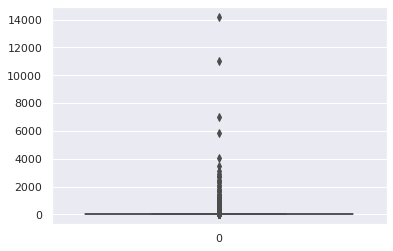

In [ ]:
boxplot = sns.boxplot(data=df_merge["likes"])

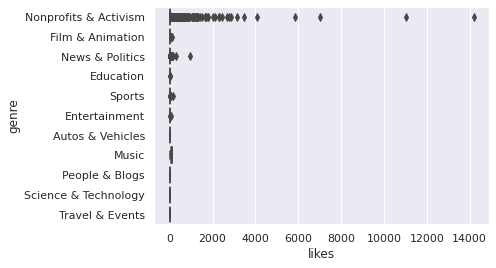

In [ ]:
boxplot_genre_likes = sns.boxplot(x="likes", y="genre", data=df_merge)

__________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________
### <font color='orange'>Histograms</font>
* Create a histogram that shows the distribution of data in the  "number of faces" column of the Microsoft Indexer data file

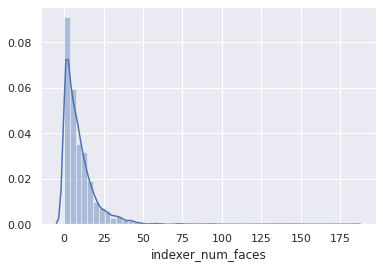

In [ ]:
num_faces_hist = sns.distplot(df_merge["indexer_num_faces"])

__________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________
# <font color='orange'>Analysis</font>
Once we have finished our exploratory visualizations, we need to run the analysis.

__________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________
##<font color='orange'>Deal with categorical variables</font>

In [ ]:
columns = ['genre', 'indexer_source_language', 'date_published_year', 'date_published_month', 'date_published_day']
df_merge = pd.get_dummies(df_merge, columns=columns, drop_first=True)

In [ ]:
df_merge.head()

,height,is_family_friendly,likes,width,tags_length,title_entities_unicef,title_entities_haiti,title_entities_pakistan,title_entities_congo,title_entities_syrian,title_entities_dr,title_entities_ethiopia,title_entities_somalia,title_entities_afghanistan,title_entities_syria,title_entities_kenya,title_entities_gaza,title_entities_2,title_entities_niger,title_entities_unicef_executive,title_entities_un,title_entities_unicef_executive_board,title_entities_myanmar,title_entities_mia_farrow,title_entities_executive_board,title_entities_india,title_entities_lebanon,title_entities_palestinian,title_entities_philippines,title_entities_chad,title_entities_uganda,title_entities_bangladesh,title_entities_africa,title_entities_zimbabwe,title_entities_first,title_entities_mali,title_entities_5,title_entities_iraq,title_entities_south_sudan,title_entities_nigeria,...,date_published_month_3,date_published_month_4,date_published_month_5,date_published_month_6,date_published_month_7,date_published_month_8,date_published_month_9,date_published_month_10,date_published_month_11,date_published_month_12,date_published_day_2,date_published_day_3,date_published_day_4,date_published_day_5,date_published_day_6,date_published_day_7,date_published_day_8,date_published_day_9,date_published_day_10,date_published_day_11,date_published_day_12,date_published_day_13,date_published_day_14,date_published_day_15,date_published_day_16,date_published_day_17,date_published_day_18,date_published_day_19,date_published_day_20,date_published_day_21,date_published_day_22,date_published_day_23,date_published_day_24,date_published_day_25,date_published_day_26,date_published_day_27,date_published_day_28,date_published_day_29,date_published_day_30,date_published_day_31
0,720,True,2.0,1280,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,720,True,898.0,1280,8,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,720,True,2.0,1280,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,360,True,17.0,480,10,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
5,360,True,19.0,480,8,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


_______________________________________________________________________________________________________________________________________________________________________________________________________________
##<font color='orange'>Regression analysis</font>

In [ ]:
Y = df_merge["likes"]
X = df_merge.drop(['likes'], axis=1).astype(float)
X = sm.add_constant(X)

model = sm.OLS(Y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  likes   R-squared:                       0.208
Model:                            OLS   Adj. R-squared:                  0.083
Method:                 Least Squares   F-statistic:                     1.665
Date:                Wed, 17 Jun 2020   Prob (F-statistic):           1.30e-16
Time:                        05:11:44   Log-Likelihood:                -27980.
No. Observations:                3868   AIC:                         5.702e+04
Df Residuals:                    3340   BIC:                         6.032e+04
Df Model:                         527                                         
Covariance Type:            nonrobust                                         
                                                                                      coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------

In [ ]:
(results.summary())$coefficients[,4]

SyntaxError: ignored

_______________________________________________________________________________________________________________________________________________________________________________________________________________
##<font color='orange'>Variance Inflation Factor</font>

In [ ]:
vif = variance_inflation_factor(X)

In [ ]:
df_coeffs = pd.DataFrame({"Coefficients": results.params, "p": results.pvalues, "vif": vif["vif"]})
df_coeffs = df_coeffs.drop("const", axis=0)
df_coeffs_sorted = df_coeffs.reindex(df_coeffs["p"].sort_values().index)
df_coeffs_sorted.style.bar(subset = ["Coefficients", "p", "vif"], align='mid', color=['#d65f5f', '#5fba7d'])

In [ ]:
df_vif = X.loc[:, vif["vif"] <= 5]

_______________________________________________________________________________________________________________________________________________________________________________________________________________
##<font color='orange'>Redo regression analysis</font>

In [ ]:
Y = df_merge["likes"]
X = sm.add_constant(df_vif.astype(float))

model = sm.OLS(Y, X)
results = model.fit()
print(results.summary())

_______________________________________________________________________________________________________________________________________________________________________________________________________________
# <font color='orange'>Recommendations to UNICEF</font>

What can we recommend to UNICEF?

* Include "UNICEF" in the title of their video?
* Publish videos on December?
* More video content about Health/Social Work?